In [ ]:
import numpy as np
import matplotlib as mp
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
data = pd.read_csv('/content/House_Rent_Dataset.csv')
print(data.head())

    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

In [ ]:
data['Rent'].describe

<bound method NDFrame.describe of 0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4746, dtype: int64>

<Axes: ylabel='Frequency'>

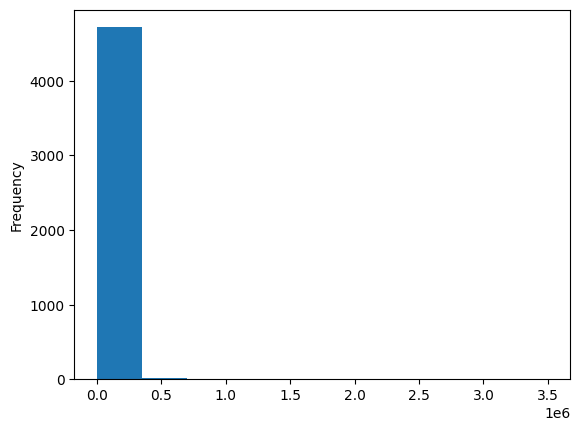

In [ ]:
data['Rent'].plot.hist()

In [ ]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [ ]:
data['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [ ]:
#custom method to encode
#mapping = {
  #  'Unfurnished':0,
    #'Semi-Furnished':1,
 #   'Furnished':2
#}
#data['Furnishing Status'] = data['Furnishing Status'].map(mapping)
#data['Furnishing Status'].unique()

array([0, 1, 2])

In [ ]:
data['Furnishing Status'] = label_encoder.fit_transform(data['Furnishing Status'])
data['Furnishing Status'].unique()

array([2, 1, 0])

Text(0, 0.5, 'Rent')

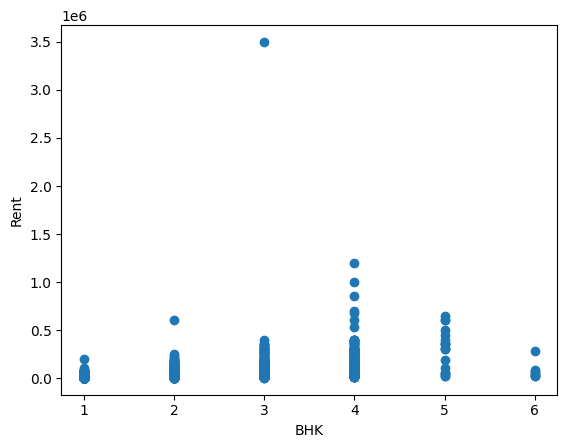

In [ ]:
x_mean = np.mean(data['Rent'])
y_mean = np.mean(data['BHK'])
x = np.array(data['Rent'])
n = np.size(x)
Sxy = np.sum(data['Rent']*data['BHK'])- n*x_mean*y_mean
Sxx = np.sum(data['Rent']*data['Rent'])-n*x_mean*x_mean
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
plt.scatter(data['BHK'], data['Rent'])
plt.xlabel('BHK')
plt.ylabel('Rent')

Text(0, 0.5, 'BHK')

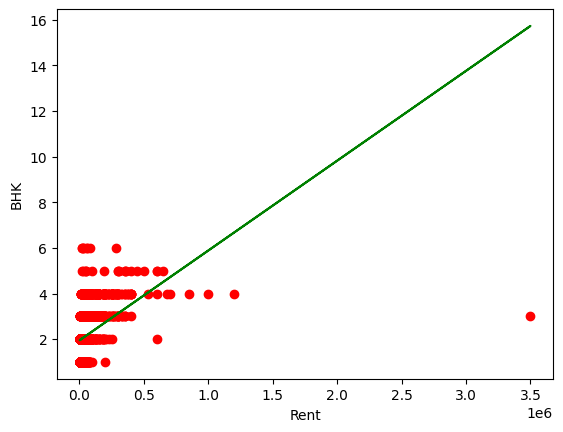

In [ ]:

y_pred = b1 * data['Rent'] + b0

plt.scatter(data['Rent'], data['BHK'], color = 'red')
plt.plot(data['Rent'], y_pred, color = 'green')
plt.xlabel('Rent')
plt.ylabel('BHK')


In [ ]:
error = data['BHK'] - y_pred
se = np.sum(error**2)
print('squared error is', se)

mse = se/n
print('mean squared error is', mse)

rmse = np.sqrt(mse)
print('root mean square error is', rmse)

SSt = np.sum((data['BHK'] - y_mean)**2)
R2 = 1- (se/SSt)
print('R square is', R2)


squared error is 2837.3715267530133
mean squared error is 0.5978448223246973
root mean square error is 0.773204256535553
R square is 0.13669108473185176


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [ ]:
x = np.array(data['Rent'])
x = x.reshape(-1,1)
regression_model = LinearRegression()

# Fit the data(train the model)
regression_model.fit(x, data['BHK'])

# Predict
y_predicted = regression_model.predict(x)

# model evaluation
mse=mean_squared_error(data['BHK'],y_predicted)

rmse = np.sqrt(mean_squared_error(data['BHK'], y_predicted))
r2 = r2_score(data['BHK'], y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('MSE:',mse)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [3.93949255e-06]
Intercept: 1.9460036518676254
MSE: 0.5978448223246973
Root mean squared error:  0.773204256535553
R2 score:  0.13669108473185176


Text(0, 0.5, 'BHK')

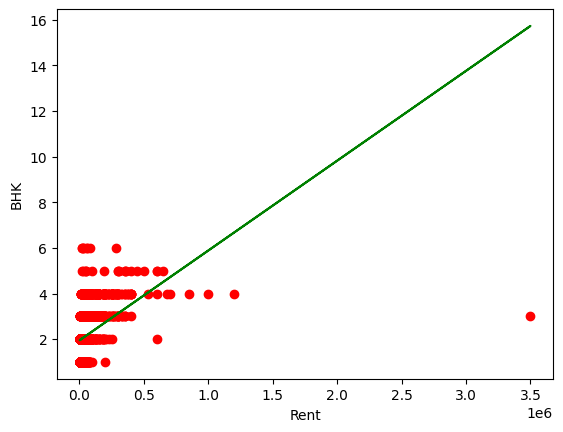

In [ ]:
plt.scatter(data['Rent'], data['BHK'], color = 'red')
plt.plot(data['Rent'], y_predicted, color = 'green')
plt.xlabel('Rent')
plt.ylabel('BHK')


Text(0, 0.5, 'Rent')

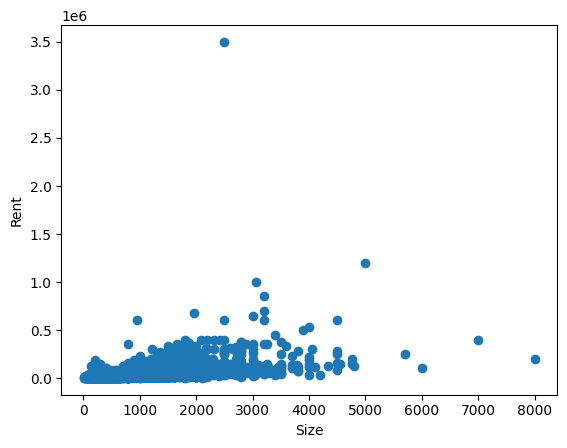

In [ ]:
x_mean = np.mean(data['Rent'])
y_mean = np.mean(data['Size'])
x = np.array(data['Rent'])
n = np.size(x)
Sxy = np.sum(data['Rent']*data['Size'])- n*x_mean*y_mean
Sxx = np.sum(data['Rent']*data['Rent'])-n*x_mean*x_mean
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
plt.scatter(data['Size'], data['Rent'])
plt.xlabel('Size')
plt.ylabel('Rent')

Text(0, 0.5, 'Size')

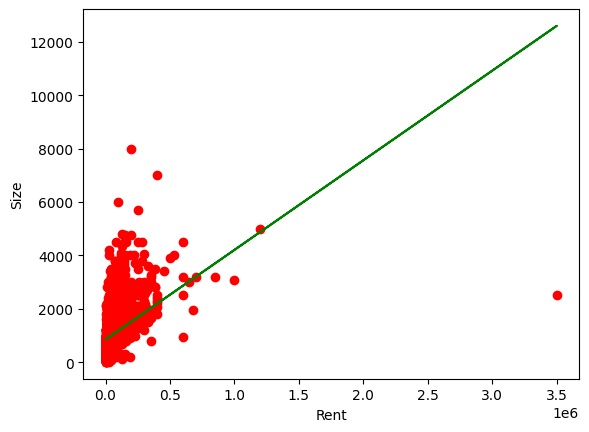

In [ ]:
y_pred = b1 * data['Rent'] + b0

plt.scatter(data['Rent'], data['Size'], color = 'red')
plt.plot(data['Rent'], y_pred, color = 'green')
plt.xlabel('Rent')
plt.ylabel('Size')

In [ ]:
error = data['Size'] - y_pred
se = np.sum(error**2)
print('squared error is', se)

mse = se/n
print('mean squared error is', mse)

rmse = np.sqrt(mse)
print('root mean square              Area Locality     City Furnishing Status  Tenant Preferred  \ error is', rmse)

SSt = np.sum((data['Size'] - y_mean)**2)
R2 = 1- (se/SSt)
print('R square is', R2)

squared error is 1582099221.6114364
mean squared error is 333354.2396989963
root mean square              Area Locality     City Furnishing Status  Tenant Preferred  \ error is 577.3683743495103
R square is 0.17102422962807484


Text(0, 0.5, 'Rent')

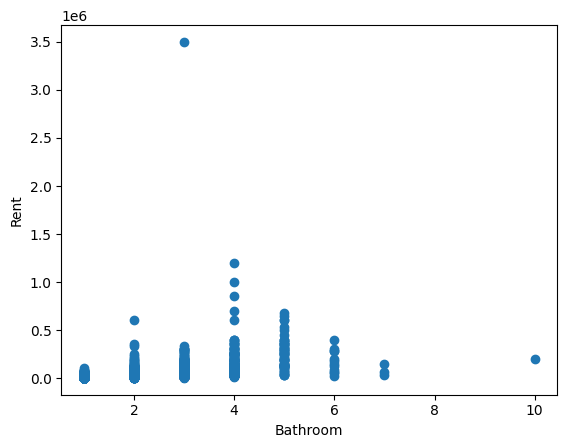

In [ ]:
x_mean = np.mean(data['Rent'])
con_var = data['Bathroom']
y_mean = np.mean(con_var)
x = np.array(data['Rent'])
n = np.size(x)
Sxy = np.sum(data['Rent']*con_var)- n*x_mean*y_mean
Sxx = np.sum(data['Rent']*data['Rent'])-n*x_mean*x_mean
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
plt.scatter(con_var, data['Rent'])
plt.xlabel('Bathroom')
plt.ylabel('Rent')

Text(0, 0.5, 'Bathroom')

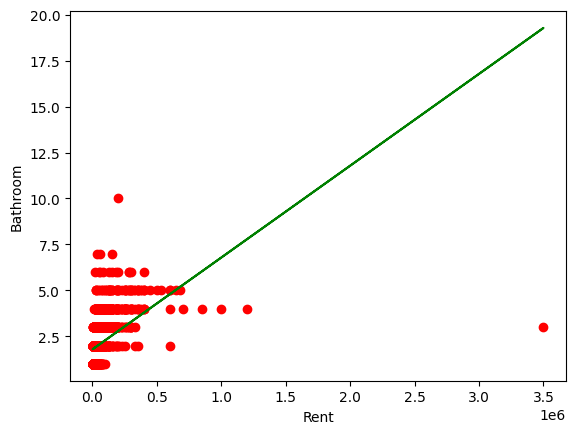

In [ ]:
y_pred = b1 * data['Rent'] + b0

plt.scatter(data['Rent'], con_var, color = 'red')
plt.plot(data['Rent'], y_pred, color = 'green')
plt.xlabel('Rent')
plt.ylabel('Bathroom')

In [ ]:
error = con_var - y_pred
se = np.sum(error**2)
print('squared error is', se)

mse = se/n
print('mean squared error is', mse)

rmse = np.sqrt(mse)
print('root mean square error is', rmse)

SSt = np.sum((con_var - y_mean)**2)
R2 = 1- (se/SSt)
print('R square is', R2)

squared error is 2989.7604387439956
mean squared error is 0.6299537376198895
root mean square error is 0.7936962502241581
R square is 0.19467087826231588


Text(0, 0.5, 'Rent')

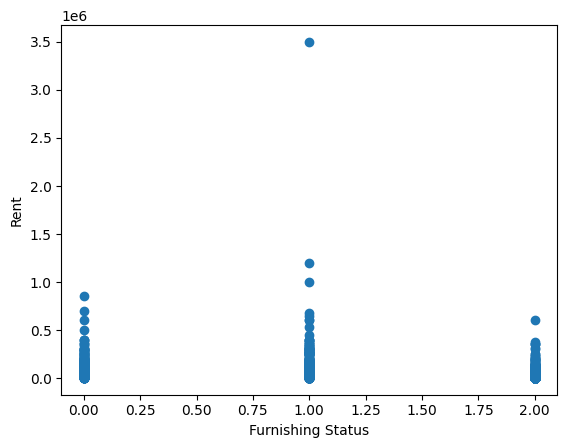

In [ ]:
con_var = data['Furnishing Status']
x_mean = np.mean(data['Rent'])
y_mean = np.mean(con_var)
x = np.array(data['Rent'])
n = np.size(x)
Sxy = np.sum(data['Rent']*con_var)- n*x_mean*y_mean
Sxx = np.sum(data['Rent']*data['Rent'])-n*x_mean*x_mean
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
plt.scatter(con_var, data['Rent'])
plt.xlabel('Furnishing Status')
plt.ylabel('Rent')


Text(0, 0.5, 'Size')

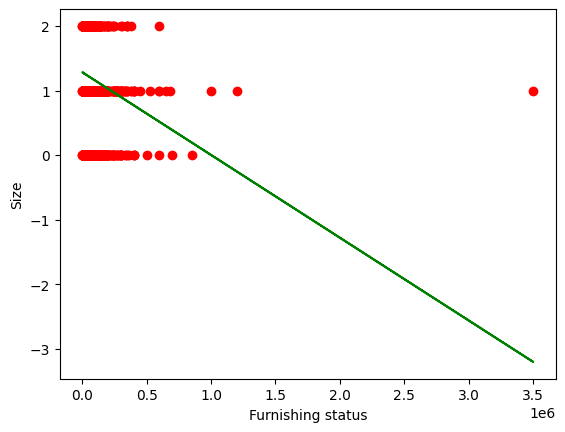

In [ ]:
y_pred = b1 * data['Rent'] + b0

plt.scatter(data['Rent'], con_var, color = 'red')
plt.plot(data['Rent'], y_pred, color = 'green')
plt.xlabel('Furnishing status')
plt.ylabel('Size')

In [ ]:
error = con_var - y_pred
se = np.sum(error**2)
print('squared error is', se)

mse = se/n
print('mean squared error is', mse)

rmse = np.sqrt(mse)
print('root mean square error is', rmse)

SSt = np.sum((con_var - y_mean)**2)
R2 = 1- (se/SSt)
print('R square is', R2)

squared error is 2176.005444048337
mean squared error is 0.45849250822763105
root mean square error is 0.677120748631757
R square is 0.021389386906489394
